## Initial Steps and Data upload

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = 'walmart.csv'

In [4]:
import pandas as pd
df = pd.read_csv(file_path)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Understanding Data

From above we know we have following columns:


*   User Id
*   Product Id
* Gender
* Age
* Occupation
* City Category
* Current stay city years
* Marital Status
* product Category
* Purchase



In [5]:
# Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
# Check for missing values
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# Summary of Dataset
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


So we have totaly 10 features, out of which:

Categorical features are - Gender, Age, City_Category, Stay_In_Current_City_Years, Product_ID

Numerical features are - Occupation, Marital_Status, Product_Category, Purchase

In [9]:
# Now for the ease of computation let's try to understand the categorical features and try to convert them to numerical values

categorical_features = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Product_ID']
for col in categorical_features:
  print(f"{col}: {df[col].unique()}")

Gender: ['F' 'M']
Age: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
City_Category: ['A' 'C' 'B']
Stay_In_Current_City_Years: ['2' '4+' '3' '1' '0']
Product_ID: ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']


Let's proceed with encoding categorical values so as to proceed with computations

In [10]:
# Encoding gender
df['Gender'] = df['Gender'].map({'F': 1, 'M': 0})
#

In [11]:
# encoding city category
df['City_Category'] = df['City_Category'].map({'A': 0, 'B': 1, 'C': 2})

In [12]:
# encoding age group
age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
df['Age'] = df['Age'].map(age_mapping)

In [13]:
# visualize the update data frame
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,1,0,10,0,2,0,3,8370
1,1000001,P00248942,1,0,10,0,2,0,1,15200
2,1000001,P00087842,1,0,10,0,2,0,12,1422
3,1000001,P00085442,1,0,10,0,2,0,12,1057
4,1000002,P00285442,0,6,16,2,4+,0,8,7969


In [14]:
# we observe inconsistency with stay in current city years with numbers like 4+, let's convert them to integers

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '').astype(int)

In [15]:
# let's visualize again
df.head(15)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,1,0,10,0,2,0,3,8370
1,1000001,P00248942,1,0,10,0,2,0,1,15200
2,1000001,P00087842,1,0,10,0,2,0,12,1422
3,1000001,P00085442,1,0,10,0,2,0,12,1057
4,1000002,P00285442,0,6,16,2,4,0,8,7969
5,1000003,P00193542,0,2,15,0,3,0,1,15227
6,1000004,P00184942,0,4,7,1,2,1,1,19215
7,1000004,P00346142,0,4,7,1,2,1,1,15854
8,1000004,P0097242,0,4,7,1,2,1,1,15686
9,1000005,P00274942,0,2,20,0,1,1,8,7871


## Exploratory Data Analytics - EDA


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-17-d2b815c10c8d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', ax=axes[0], palette='coolwarm')
<ipython-input-17-d2b815c10c8d>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Male', 'Female'])
<ipython-input-17-d2b815c10c8d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age', ax=axes[1], palette='viridis')
<ipython-input-17-d2b815c10c8d>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['0-17', '18-25','26-35','36-4

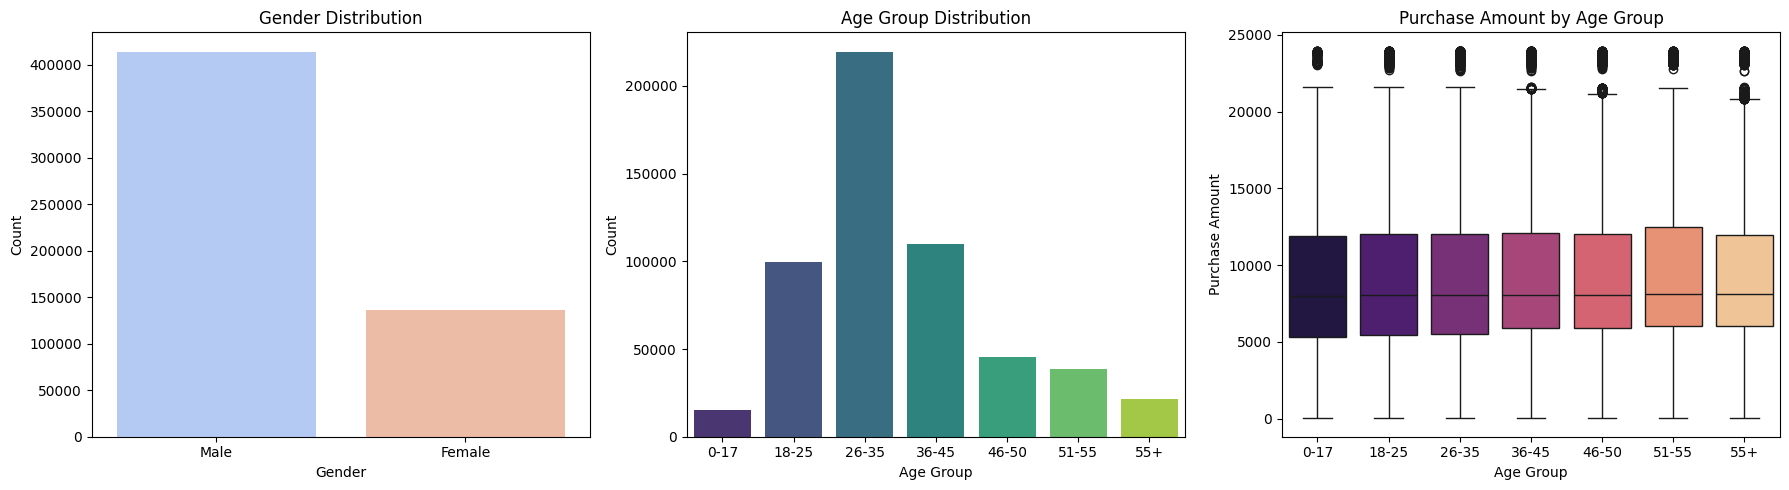

In [17]:
# Set figure size and layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Gender Distribution
sns.countplot(data=df, x='Gender', ax=axes[0], palette='coolwarm')
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Male', 'Female'])

# 2. Age Distribution
sns.countplot(data=df, x='Age', ax=axes[1], palette='viridis')
axes[1].set_title('Age Group Distribution')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['0-17', '18-25','26-35','36-45','46-50','51-55','55+'])

# 3️. Spending Pattern by Age Group
sns.boxplot(data=df, x='Age', y='Purchase', ax=axes[2], palette='magma')
axes[2].set_title('Purchase Amount by Age Group')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Purchase Amount')
axes[2].set_xticklabels(['0-17', '18-25','26-35','36-45','46-50','51-55','55+'])

# Show plots
plt.tight_layout()
plt.show()


<ipython-input-18-da9c680f33aa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='City_Category', ax=axes[0], palette='coolwarm')
<ipython-input-18-da9c680f33aa>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['A', 'B', 'C'])
<ipython-input-18-da9c680f33aa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='City_Category', y='Purchase', ax=axes[1], palette='viridis')
<ipython-input-18-da9c680f33aa>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['A

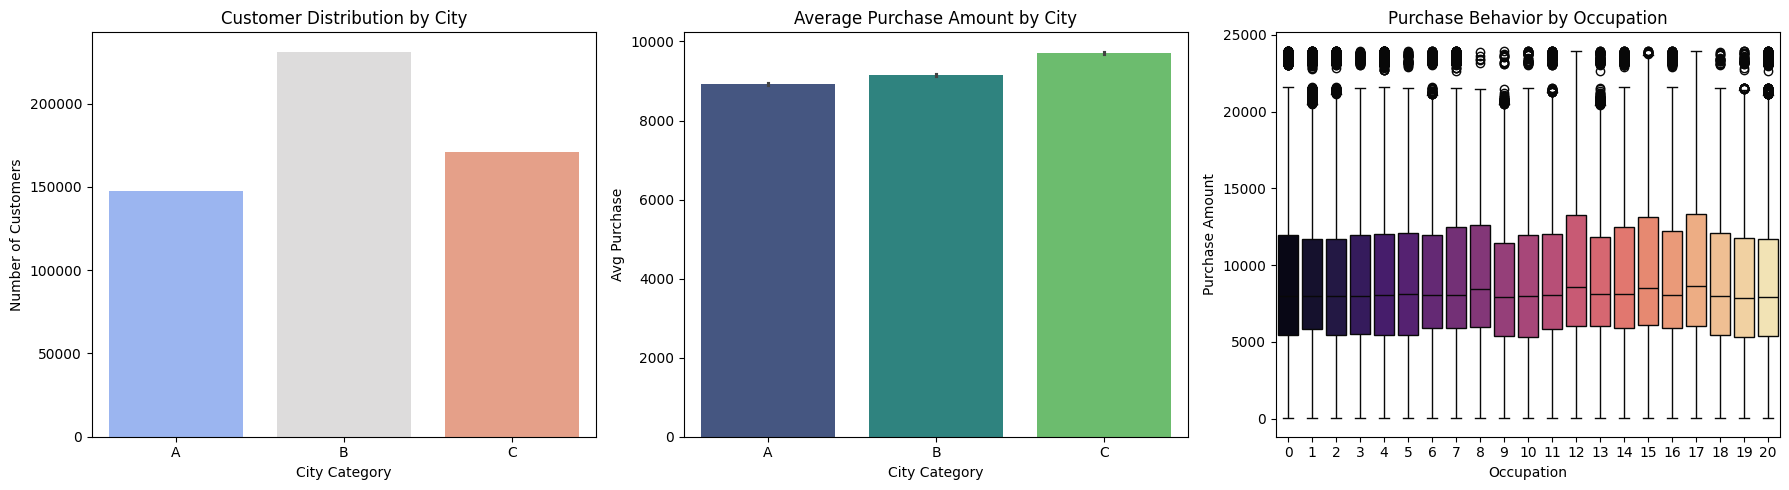

In [18]:
# City-Wise Analysis & Occupation-Based Spending Patterns

# Set figure size and layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Customer Distribution by City
sns.countplot(data=df, x='City_Category', ax=axes[0], palette='coolwarm')
axes[0].set_title('Customer Distribution by City')
axes[0].set_xlabel('City Category')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xticklabels(['A', 'B', 'C'])

# 2. Average Purchase by City
sns.barplot(data=df, x='City_Category', y='Purchase', ax=axes[1], palette='viridis')
axes[1].set_title('Average Purchase Amount by City')
axes[1].set_xlabel('City Category')
axes[1].set_ylabel('Avg Purchase')
axes[1].set_xticklabels(['A', 'B', 'C'])

# 3. Occupation-Based Spending Patterns
sns.boxplot(data=df, x='Occupation', y='Purchase', ax=axes[2], palette='magma')
axes[2].set_title('Purchase Behavior by Occupation')
axes[2].set_xlabel('Occupation')
axes[2].set_ylabel('Purchase Amount')

# Show plots
plt.tight_layout()
plt.show()


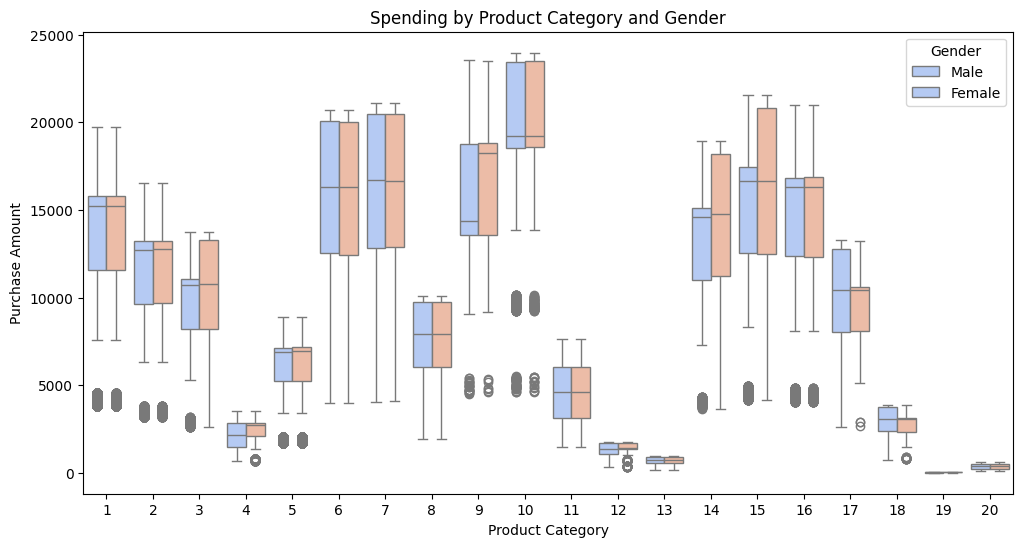

In [21]:
# Average Spending by Gender and Product Category (Grouped Bar Chart)
# Box Plot for Spending by Product Category
plt.figure(figsize=(12, 6))

# Create box plot
sns.boxplot(data=df, x='Product_Category', y='Purchase', hue='Gender', palette='coolwarm')
plt.title('Spending by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


In [31]:
# Correlation matrix

# Drop Product_ID for correlation analysis
correlation_matrix = df.drop(columns=['User_ID','Product_ID']).corr()
correlation_matrix


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
Gender,1.000000,0.004262,-0.117291,0.004515,-0.014660,0.011603,0.045594,-0.060346
Age,0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.015839
Occupation,-0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.020833
City_Category,0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.061914
Stay_In_Current_City_Years,-0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.005422
Marital_Status,0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,-0.000463
Product_Category,0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.343703
Purchase,-0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,1.000000


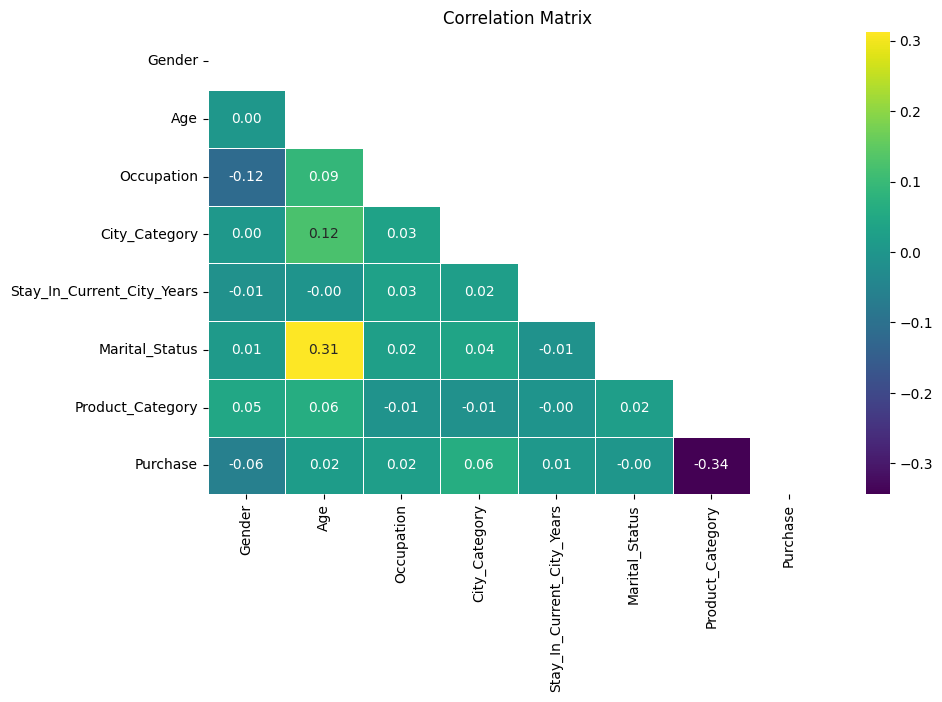

In [36]:
## Since we already have Product_Category, which generalizes products into categories, we can rely on this feature instead of Product_ID.
import numpy as np
# Create a mask to hide the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    mask=mask,  # Apply the mask
    annot=True,
    cmap='viridis',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Matrix')
plt.show()

* Gender and Purchase (r = -0.06)
Slight negative correlation suggests that Gender has minimal influence on Purchase Amount.
It doesn’t imply no dependency, but the effect is weak.

* Gender and Occupation (r = -0.12)
Weak negative correlation suggests that certain genders may be associated with specific occupations, but the relationship is not strong.

* Age and Marital Status (r = 0.31)
Moderate positive correlation indicates that older individuals are more likely to be married.
This makes sense as marital status naturally correlates with age.

* Age and City Category (r = 0.12)
Weak positive correlation suggests that certain age groups might be concentrated in specific city categories.
For example, younger people might reside more in urban cities (City A) than suburban (City C).

* Product Category and Purchase (r = -0.34)
Moderate negative correlation suggests that higher product categories may not always lead to higher purchase amounts.
This could indicate that certain expensive product categories are less frequently purchased.

* *Age, Marital Status, and Product Category seem relevant for segmentation.*

* Weak correlations don’t mean the features are irrelevant—they may still contribute when combined with engineered features (like RFM scores).

## RFM based Feature Engineering

* Recency: How recently a customer made a purchase.
* Frequency: How often they purchase.
* Monetary: How much they spend.

Note: We do not have date field in the dataset so we will ignore recency for now



In [38]:
# Calculate Frequency and Monetary for each customer
rfm = df.groupby('User_ID').agg({
    'Purchase': ['count', 'sum'] #count gives frequency, sum gives total amount spent for each User_ID
}).reset_index()

# Rename columns for clarity
rfm.columns = ['User_ID', 'Frequency', 'Monetary']

# Preview the RFM table
rfm.head(10)


,User_ID,Frequency,Monetary
0,1000001,35,334093
1,1000002,77,810472
2,1000003,29,341635
3,1000004,14,206468
4,1000005,106,821001
5,1000006,47,379930
6,1000007,17,234668
7,1000008,77,796593
8,1000009,58,594099
9,1000010,223,2169510


In [43]:
# Normalizing the values for peoper segmentation

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize Frequency and Monetary
rfm[['Frequency', 'Monetary']] = scaler.fit_transform(rfm[['Frequency', 'Monetary']])

# Preview normalized RFM table
rfm.head(10)


,User_ID,Frequency,Monetary
0,1000001,0.028431,0.027398
1,1000002,0.069608,0.072810
2,1000003,0.022549,0.028117
3,1000004,0.007843,0.015232
4,1000005,0.098039,0.073813
5,1000006,0.040196,0.031768
6,1000007,0.010784,0.017920
7,1000008,0.069608,0.071487
8,1000009,0.050980,0.052184
9,1000010,0.212745,0.202363


## K-Means with different inertia values

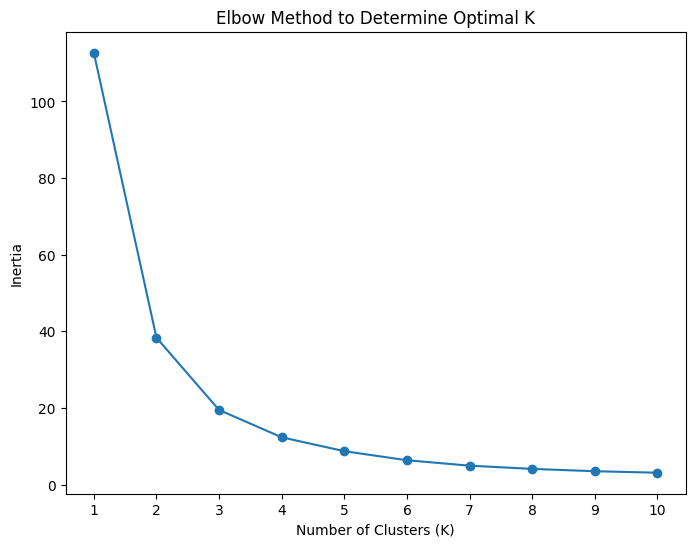

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Test K values from 1 to 10
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm[['Frequency', 'Monetary']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.show()


Observing here, the optimal K seems to be k = 3 or k = 4

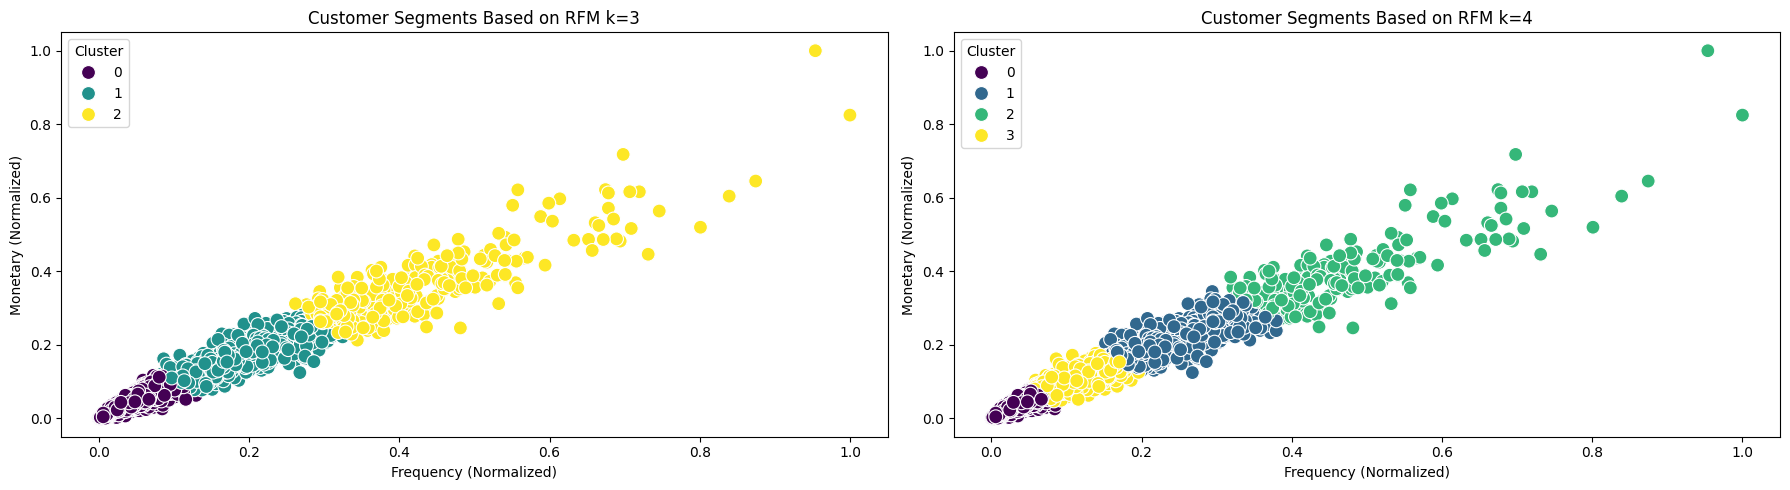

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# 1. k = 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm[['Frequency', 'Monetary']])
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', s=100, ax=axes[0])
axes[0].set_title('Customer Segments Based on RFM k=3')
axes[0].set_xlabel('Frequency (Normalized)')
axes[0].set_ylabel('Monetary (Normalized)')
axes[0].legend(title='Cluster')

# 2. k = 4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm[['Frequency', 'Monetary']])
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', s=100, ax=axes[1])
axes[1].set_title('Customer Segments Based on RFM k=4')
axes[1].set_xlabel('Frequency (Normalized)')
axes[1].set_ylabel('Monetary (Normalized)')
axes[1].legend(title='Cluster')

# Show plots
plt.tight_layout()
plt.show()


The Optimal K value I choose is K = 3 (the elbow point)

Key Observations:

* Cluster with Low Frequency and Low Monetary (Cluster 0 - Purple):
  - This represents low-value customers.
  - They purchase infrequently and spend very little.
These could be one-time buyers or dormant customers who need reactivation campaigns.

* Linear Relationship in the Graph:

 The chart shows a clear trend:
  - As Frequency increases, Monetary value also increases.
  - This means that frequent customers are likely to spend more, which aligns with the marketing funnel concept of loyal customers contributing more revenue.

* Moderate Value Customers (Cluster 1 - Green):
  - Customers with moderate frequency and spending fall in this segment.
  - These could be regular shoppers but not high-value spenders.

* High Frequency and High Monetary (Cluster 2 - Yellow):
  - Represents top customers or VIPs.
  - These are loyal, high-value customers who shop frequently and spend the most.
  - This segment should be targeted with premium offers, loyalty rewards, and personalized campaigns to retain them.

## Cluster Analysis

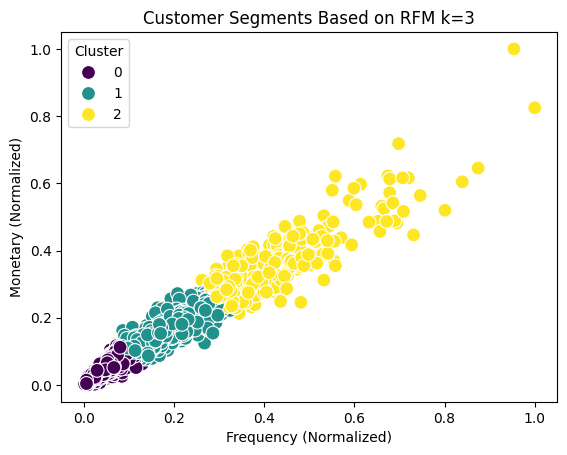

In [61]:
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm[['Frequency', 'Monetary']])
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments Based on RFM k=3')
plt.xlabel('Frequency (Normalized)')
plt.ylabel('Monetary (Normalized)')
plt.legend(title='Cluster')
plt.show()

In [62]:
# Analyze cluster characteristics
cluster_analysis = rfm.groupby('Cluster').agg({
    'Frequency': 'mean',
    'Monetary': 'mean',
    'User_ID': 'count'  # Count of customers in each cluster
}).rename(columns={'User_ID': 'Customer_Count'})

# Display cluster analysis
cluster_analysis


,Frequency,Monetary,Customer_Count
Cluster,,,
0,0.037302,0.035974,4346
1,0.171765,0.156050,1234
2,0.419794,0.355769,311


* Cluster 0: Low-Value Customers (Top of the Engagement Funnel)

  Action: Run win-back campaigns with personalized discounts to encourage repeat purchases.
Example: "We miss you! Enjoy 20% off your next order this weekend only!"

* Cluster 1: Moderate-Value Customers (Middle of the Engagement Funnel)

  Action: Introduce tiered loyalty programs to incentivize higher spending and frequency.
Example: "Earn double points this week and unlock exclusive rewards!"

* Cluster 2: High-Value Customers (Bottom of the Engagement Funnel)

  Action: Offer exclusive perks like early access to sales or free shipping to retain their loyalty.
Example: "As a valued customer, enjoy VIP early access to our new collection!"


## Evaluating cluster performance

Eventhough we have our inital summary ready from our initial analysis, let's see if the clustering is valid before be take any business decisions by analysing the cluster.

We can do this with the help of silhouette score, where:

The Silhouette Score ranges from -1 to 1:
- +1: Clusters are well-separated and clearly distinct.
- 0: Clusters overlap or are poorly separated.
- -1: Incorrect clustering (data points assigned to the wrong cluster).

A higher score (closer to 1) indicates better-defined clusters.

In [63]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for K=3
silhouette_k3 = silhouette_score(rfm[['Frequency', 'Monetary']], rfm['Cluster'])

# Print the result
print(f'Silhouette Score for K=3: {silhouette_k3:.2f}')


Silhouette Score for K=3: 0.67


Since the score is more than 0.5, this means the clusters are reasonably well seperated.